<a href="https://colab.research.google.com/github/husthorng/Backpropagation_NN/blob/wirecut/backpropagation_4x3y_wirecut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1ntZ25g8MeD5J_xxZHiSbOSR5VMWuK7lS#scrollTo=qS9oZpyRFmgs

https://docs.google.com/spreadsheets/d/1dw2-MrPAIBmut8_dW1kHavFB0XjQdK4G/edit#gid=1459532028

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd



def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))





epstep=500

#numTag = int(input('Insert the number Neurons into Output Layer: ') or 3) # default value is 3
#epochs = int(input('Insert the number of Epochs: ') or 10000) # default value is 10000
#hidden_node = int(input('Insert the number Neurons into Hidden Layer: ') or 6) # default value is 6
#lr = float(input('Insert Learning Rate: ') or 0.02) # default value is 0.02
#SSE_Goal = float(input('Insert Expected Error: ') or 0.05) # default value is 0.02
numTag=3
pernum=100
epochs=10000
hidden_node=6
lr=0.02
SSE_Goal=0.05


#ur2 = "https://raw.githubusercontent.com/husthorng/hello-world/horng_1/N_Q.csv"

#ur2 ="https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/data4X3y_NQ.csv"
#ur2 ="/content/drive/MyDrive/Colab Notebooks/BP/wirecut_3.csv"
ur2 ="https://raw.githubusercontent.com/husthorng/Backpropagation_NN/wirecut/wirecut_3.csv"

In [ ]:
`

In [ ]:
SSE_Goal=0.05
lr=0.02

In [ ]:
records = pd.read_csv(ur2,encoding='utf-8')
Xi1=records.iloc[0:records.shape[0]].values

max_min_Xi=np.array([list(np.max(Xi1,axis=0)),list(np.min(Xi1,axis=0))])
ptp_Xi=np.ptp(max_min_Xi,axis=0)
NXi=(Xi1 - np.min(Xi1,axis=0))/ptp_Xi
#NXi*ptp_Xi+max_min_Xi[1]

In [ ]:
max_min_Xi

array([[9.000e+00, 7.500e+01, 1.000e+01, 4.100e+01, 2.702e+03, 2.579e+00,
        2.727e+00],
       [2.000e+00, 6.300e+01, 2.000e+00, 1.000e+00, 9.870e+02, 1.822e+00,
        2.023e+00]])

In [ ]:
Xi1=pd.DataFrame(Xi1)
inputD=Xi1.iloc[0:Xi1.shape[0],0:Xi1.shape[1]-numTag].values
#inputD[0] #[234.  ,   0.34, 115.  ,   0.37]
targetD=Xi1.iloc[:,list(Xi1.shape[1]-np.arange(numTag,0,-1))].values
#targetD[0] #[ 47.39592, 943.3549 ]

In [ ]:
targetD[0]

array([2.443e+03, 1.922e+00, 2.083e+00])

In [ ]:
W1=np.random.rand(hidden_node,inputD.shape[1]+1)*0.5
W2=np.random.rand(targetD.shape[1],hidden_node+1)*0.5
onex=np.ones(inputD.shape[0],dtype=int)


In [ ]:
max_min_l=np.array([list(np.max(inputD,axis=0)),list(np.min(inputD,axis=0))])
#max_min_l=np.array([max_min_l[0]*1.1,max_min_l[1]*0.9])
max_min_l

array([[ 9., 75., 10., 41.],
       [ 2., 63.,  2.,  1.]])

In [ ]:
np.insert(inputD,0,max_min_l,axis=0)
inputD1=np.insert(inputD,0,max_min_l,axis=0)
ptp_inputD1=np.ptp(inputD1,axis=0)
ptp_inputD1

array([ 7., 12.,  8., 40.])

In [ ]:
inputD2=(inputD1 - np.min(inputD1,axis=0))/ptp_inputD1
#inputD2
inputD3=inputD2[2:,:]
#inputD3
inputD3_1=np.insert(inputD3, 0, 1, axis=1)
inputD3_1[0] #array([1.      , 0.3     , 0.2     , 0.796875, 0.1     ])


array([1. , 0. , 0.5, 0.5, 0.5])

In [ ]:
inputD3_1

In [ ]:
max_min_T=np.array([list(np.max(targetD,axis=0)),list(np.min(targetD,axis=0))])
#max_min_T=np.array([max_min_T[0]*1.1,max_min_T[1]*0.9])
#print(max_min_T)
targetD1=np.insert(targetD,0,max_min_T,axis=0)

ptp_targetD1=np.ptp(targetD1,axis=0)
targetD2=(targetD1 - np.min(targetD1,axis=0))/ptp_targetD1
targetD3=targetD2[2:,:]

In [ ]:
# Using thr Complete training results of W1 and W2
#url ="/content/drive/MyDrive/Colab Notebooks/BP/W1_wc.csv"
url ="https://raw.githubusercontent.com/husthorng/Backpropagation_NN/wirecut/W1_wc%20(1).csv"
W1 = np.array(pd.read_csv(url,encoding='utf-8'))[:,1:]
#url ="/content/drive/MyDrive/Colab Notebooks/BP/W2_wc.csv"
url ="https://raw.githubusercontent.com/husthorng/Backpropagation_NN/wirecut/W2_wc%20(1).csv"
W2 = np.array(pd.read_csv(url,encoding='utf-8'))[:,1:]
#url ="/content/drive/MyDrive/Colab Notebooks/BP/max_min_Xi_wc.csv"
url ="https://raw.githubusercontent.com/husthorng/Backpropagation_NN/wirecut/max_min_Xi_wc%20(1).csv"
max_min_Xi = np.array(pd.read_csv(url,encoding='utf-8'))[:,1:]

In [ ]:
ersum=100
ix=1
losses=[]
index_N=[]
# SSE_Goal=10
while ersum > SSE_Goal:
  net_h=inputD3_1@W1.T
  out_h=sigmoid(net_h,deriv=False)
  out_H1=np.insert(out_h, 0, 1, axis=1)
  net_o=out_H1@W2.T
  out_o=sigmoid(net_o,deriv=False)
  er=targetD3-out_o
  ersum=np.sum(er**2)
  if ix%pernum==0:
    losses.append(ersum)
    index_N.append(ix)
    print("run:",ix,"sumer=",ersum)
  ix+=1
  delta_o=out_o*(1-out_o)*er #delta_o= (300, 2)
  ckdao=delta_o.T@out_H1
  delta_W2=lr*delta_o.T@out_H1
  W2 = W2+delta_W2
  data2=out_h*(1-out_h)
  data1=(delta_o@W2[:,1:])*data2
  delw1=lr*((inputD3_1.T@data1).T)
  W1=W1+delw1

out_o_V=out_o*ptp_targetD1+max_min_T[1]
df = pd.DataFrame(out_o_V)
df.to_csv("out_o_V.csv")

if ersum < SSE_Goal :
    print("ersum < SSE_Goal ")
#    break
else:
    print("ersum > SSE_Goal")

In [ ]:
out_o_V[0]

array([2.43664544e+03, 1.93365235e+00, 2.10776979e+00])

In [ ]:
inputD3_1[0]

array([1. , 0. , 0.5, 0.5, 0.5])

In [ ]:
W1

array([[  8.22834756, -10.21353621,   7.71680627,  -0.5985135 ,
         -1.71518801],
       [ -2.85727922,   3.28000286,  12.7522916 , -10.12888245,
         -0.60358431],
       [  1.22457696,  -4.27286356,   5.18507976,  -5.45772169,
          3.21319149],
       [  2.56097834,  -5.38816895,  -1.25926575,   2.67261649,
         -2.29295459],
       [-13.4010055 ,   2.06507827,   7.18164084,   7.31632349,
         -0.81608022],
       [ -1.56822529,   8.64394377,  -3.12359041,   1.42708433,
          0.17056928]])

In [ ]:
W2

array([[ -1.8772237 ,   4.30967749,  -0.04851902,  -0.03106526,
          2.39194783,  -0.94400271,  -4.58709964],
       [  0.93709502, -12.61657475,   4.20759145,   1.15141478,
          6.24730766,  -2.73684937,   7.54051243],
       [ -0.03036692,   3.68751906,   3.05291951,  -5.51612184,
         -2.26759246,  -9.33694786,  -0.97755135]])

In [ ]:
import pandas as pd
df = pd.DataFrame(W1)
df.to_csv("W1_wc.csv")
df = pd.DataFrame(W2)
df.to_csv("W2_wc.csv")
df = pd.DataFrame(max_min_Xi)
df.to_csv("max_min_Xi_wc.csv")

In [ ]:
W1

array([[ 1.77902072, -4.74066027, -0.54784626,  2.40457403, -1.67759472],
       [ 1.27275344, -2.1782893 , -8.96865331,  7.99394703,  0.77491262],
       [-3.13247776,  4.86340283, -4.32601321,  6.62094912, -2.2960475 ],
       [ 4.8769701 , -5.01553602,  4.48572701, -2.33375722, -2.05141965],
       [-9.26963606,  2.41490218,  4.23239885,  4.84709066, -0.30099549],
       [-0.77133657,  8.63656363, -3.84523226,  2.31658817, -0.90587823]])

In [ ]:
hidden_node=6; lr=0.02; SSE_Goal=0.01

In [ ]:
W1=np.array([[ 1.77902072, -4.74066027, -0.54784626,  2.40457403, -1.67759472],
       [ 1.27275344, -2.1782893 , -8.96865331,  7.99394703,  0.77491262],
       [-3.13247776,  4.86340283, -4.32601321,  6.62094912, -2.2960475 ],
       [ 4.8769701 , -5.01553602,  4.48572701, -2.33375722, -2.05141965],
       [-9.26963606,  2.41490218,  4.23239885,  4.84709066, -0.30099549],
       [-0.77133657,  8.63656363, -3.84523226,  2.31658817, -0.90587823]])

In [ ]:
SSE_Goal=0.06188

hidden_node=6;
lr=0.02;
SSE_Goal=0.01

W1=np.array([[-1.6609747 , -0.53283844,  1.00002993, -4.37326884,  5.30209721],
       [-0.55486106,  1.81087051,  0.12100567, -1.58153212,  1.44313679],
       [ 3.71562894, -0.41905993, -6.36667238, 12.94792368, -6.63452647],
       [ 2.33393614, -4.88672395,  8.15882937, -9.12824946, -1.55706926],
       [ 2.15438278,  1.9183999 , -2.31685328,  4.21617212, -4.0886608 ],
       [ 2.04371179, -5.48591878,  1.33056443, -0.52112703, -0.50570083]])

W2=np.array([[  0.91127048,   1.54254859,  -5.88200793,   2.3728856 ,
          0.89424379,  -2.92850277,   3.20859003],
       [ -6.57697128,  -2.42479079,   8.03896485,  -6.30793253,
         -1.92981988,   9.44198061,   2.15257421],
       [  3.54314906, -16.63997166,  19.62932753,  -7.48436263,
         -5.22963539,  -5.14612791,   6.56974447]])

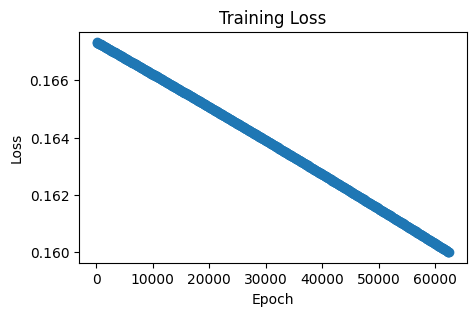

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(index_N, losses)
#plt.scatter(index_N, losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



In [ ]:
W2

array([[ -1.8772236 ,   4.30967738,  -0.04851902,  -0.03106526,
          2.39194783,  -0.9440027 ,  -4.58709962],
       [  0.93709466, -12.6165744 ,   4.20759149,   1.15141478,
          6.2473077 ,  -2.73684927,   7.5405124 ],
       [ -0.0303668 ,   3.68751896,   3.05291952,  -5.51612186,
         -2.26759247,  -9.33694761,  -0.97755135]])

In [ ]:
targetD

array([[2.4430e+03, 1.9220e+00, 2.0830e+00],
       [1.2350e+03, 2.3380e+00, 2.4870e+00],
       [2.1320e+03, 2.1600e+00, 2.4140e+00],
       [2.1810e+03, 2.0670e+00, 2.1720e+00],
       [9.9300e+02, 2.4220e+00, 2.5025e+00],
       [1.4250e+03, 2.2370e+00, 2.3925e+00],
       [1.3520e+03, 2.2970e+00, 2.4640e+00],
       [1.0720e+03, 2.3920e+00, 2.6280e+00],
       [1.4270e+03, 2.2130e+00, 2.3510e+00],
       [1.4230e+03, 2.2250e+00, 2.3650e+00],
       [2.0140e+03, 1.9190e+00, 2.1175e+00],
       [1.9670e+03, 2.1440e+00, 2.2240e+00],
       [1.0450e+03, 2.4780e+00, 2.3565e+00],
       [1.4260e+03, 2.2320e+00, 2.3925e+00],
       [1.1430e+03, 2.3150e+00, 2.5395e+00],
       [1.1020e+03, 2.4740e+00, 2.5800e+00],
       [1.2020e+03, 2.3060e+00, 2.5810e+00],
       [2.3360e+03, 2.0840e+00, 2.3730e+00],
       [1.4310e+03, 2.2130e+00, 2.3630e+00],
       [1.4290e+03, 2.2370e+00, 2.3925e+00],
       [1.6800e+03, 2.4280e+00, 2.6025e+00],
       [9.3000e+02, 2.5790e+00, 2.7270e+00],
       [1.

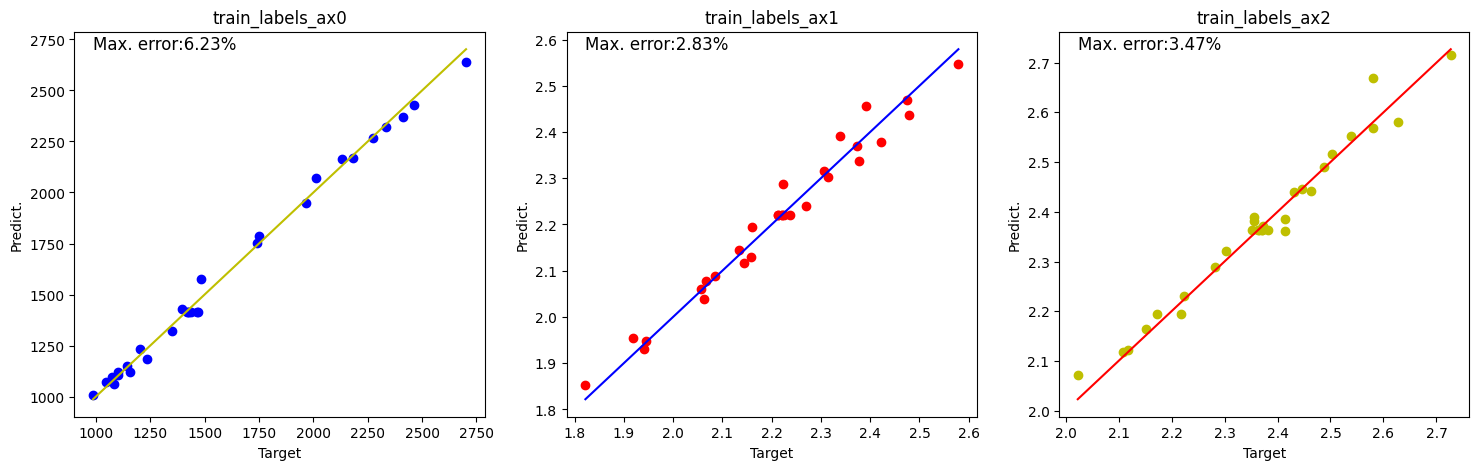

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

import pandas as pd

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
spec = gridspec.GridSpec(ncols=3, nrows=1,
              width_ratios=[1, 1,1], wspace=0.2,
              hspace=0.5, height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
ax0.plot([max_min_T[:,0][1],max_min_T[:,0][0]],[max_min_T[:,0][1],max_min_T[:,0][0]],color = "y")

ax0.scatter(targetD[:,0], out_o_V[:,0],color = "b")
ax0.set_title('train_labels_ax0')
ax0.text(max_min_T[:,0][1], max_min_T[:,0][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,0])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[1])
ax1.plot([max_min_T[:,1][1],max_min_T[:,1][0]],[max_min_T[:,1][1],max_min_T[:,1][0]],color = "b")
ax1.scatter(targetD[:,1], out_o_V[:,1],color = "r")
ax1.set_title('train_labels_ax1')
ax1.text(max_min_T[:,1][1], max_min_T[:,1][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,1])*100,2))+'%', fontsize=12)

ax2 = fig.add_subplot(spec[2])
ax2.plot([max_min_T[:,2][1],max_min_T[:,2][0]],[max_min_T[:,2][1],max_min_T[:,2][0]],color = "r")
ax2.scatter(targetD[:,2], out_o_V[:,2],color = "y")
ax2.set_title('train_labels_ax2')
ax2.text(max_min_T[:,2][1], max_min_T[:,2][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,2])*100,2))+'%', fontsize=12)

ax0.set_xlabel('Target')
ax0.set_ylabel('Predict.')
ax1.set_xlabel('Target')
ax1.set_ylabel('Predict.')
ax2.set_xlabel('Target')
ax2.set_ylabel('Predict.')
plt.show()

In [ ]:
(targetD - max_min_Xi[1][4:])/ptp_Xi[4:]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(2.083, 2.727, 'Max. error:1.42%')

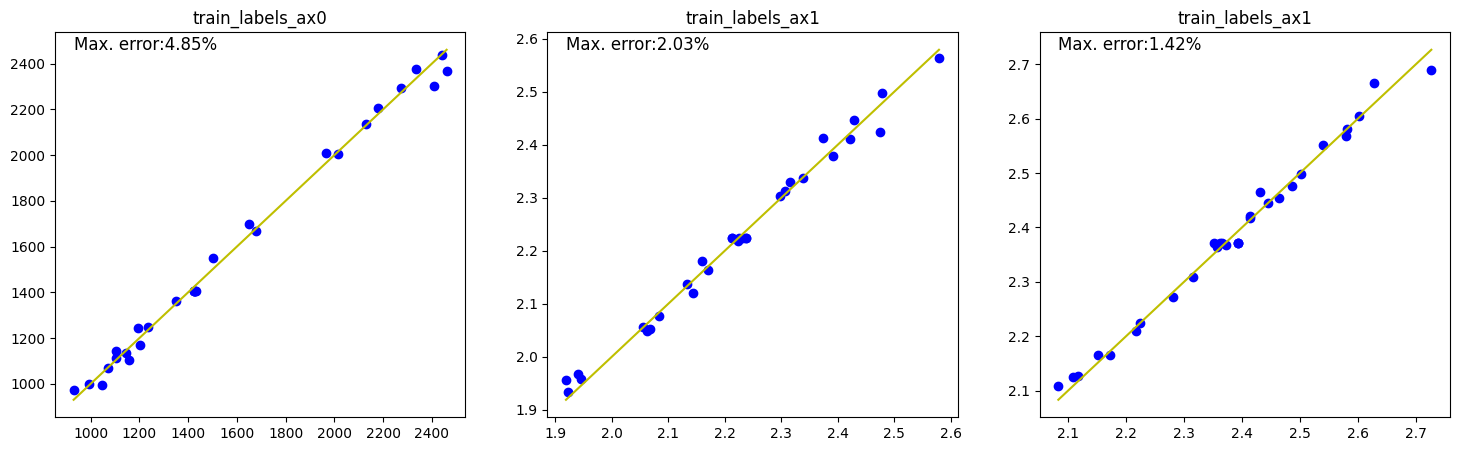

In [ ]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

numTag=3
urlsyn0 = "/content/drive/MyDrive/Colab Notebooks/BP/W1_wc.csv"
syn0t = pd.read_csv(urlsyn0,encoding='utf-8',header=None)
syn0t=np.array(syn0t)
W1=syn0t[1:,1:]

urlsyn1 = "/content/drive/MyDrive/Colab Notebooks/BP/W2_wc.csv"
syn1t = pd.read_csv(urlsyn1,encoding='utf-8',header=None)
syn1t=np.array(syn1t)
W2=syn1t[1:,1:]

#nOutputs=syn1.shape[1]
ur2 ="/content/drive/MyDrive/Colab Notebooks/BP/max_min_Xi_wc.csv"
max_min_Xi = np.array(pd.read_csv(ur2,encoding='utf-8'))[:,1:]
max_min_T=np.append([max_min_Xi[0][4:]], [max_min_Xi[1][4:]], axis=0)

ur2 ="/content/drive/MyDrive/Colab Notebooks/BP/wirecut_3.csv"
records = pd.read_csv(ur2,encoding='utf-8')

Xi1=records.iloc[0:records.shape[0]].values

Xi1=pd.DataFrame(Xi1)
inputD=Xi1.iloc[0:Xi1.shape[0],0:Xi1.shape[1]-numTag].values
#inputD[0] #[234.  ,   0.34, 115.  ,   0.37]
targetD=Xi1.iloc[:,list(Xi1.shape[1]-np.arange(numTag,0,-1))].values

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))

ptp_Xi=np.ptp(max_min_Xi,axis=0)


N_train_data=(inputD - max_min_Xi[1][:4])/ptp_Xi[:4]
inputD3_1=np.insert(N_train_data, 0, 1, axis=1)

N_train_labels=(targetD - max_min_Xi[1][4:])/ptp_Xi[4:]
targetD3=N_train_labels

#inputD3_1=np.array([1. , 0. , 0.5, 0.5, 0.5])

net_h=inputD3_1@W1.T
out_h=sigmoid(net_h,deriv=False)
out_H1=np.insert(out_h, 0, 1, axis=1)
net_o=out_H1@W2.T
out_o=sigmoid(net_o,deriv=False)
out_o_V=out_o*ptp_Xi[4:]+max_min_Xi[1][4:]
out_o_V

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
spec = gridspec.GridSpec(ncols=3, nrows=1,
              width_ratios=[1, 1,1], wspace=0.2,
              hspace=0.5, height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
ax0.plot([max_min_T[:,0][1],max_min_T[:,0][0]],[max_min_T[:,0][1],max_min_T[:,0][0]],color = "y")

ax0.scatter(targetD[:,0], out_o_V[:,0],color = "b")
ax0.set_title('train_labels_ax0')
ax0.text(max_min_T[:,0][1], max_min_T[:,0][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,0])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[1])
ax1.plot([max_min_T[:,1][1],max_min_T[:,1][0]],[max_min_T[:,1][1],max_min_T[:,1][0]],color = "y")

ax1.scatter(targetD[:,1], out_o_V[:,1],color = "b")
ax1.set_title('train_labels_ax1')
ax1.text(max_min_T[:,1][1], max_min_T[:,1][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,1])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[2])
ax1.plot([max_min_T[:,2][1],max_min_T[:,2][0]],[max_min_T[:,2][1],max_min_T[:,2][0]],color = "y")

ax1.scatter(targetD[:,2], out_o_V[:,2],color = "b")
ax1.set_title('train_labels_ax1')
ax1.text(max_min_T[:,2][1], max_min_T[:,2][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,2])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

In [ ]:
net_h[0]

array([10.92989966, -1.84736679,  2.69485174,  2.1211764 , -6.56006329,
       -2.33119371])

In [ ]:
out_h[0]

array([0.99998209, 0.13618236, 0.93672217, 0.89294444, 0.00141379,
       0.08857225])

In [ ]:
out_H1[0]

array([1.        , 0.99998209, 0.13618236, 0.93672217, 0.89294444,
       0.00141379, 0.08857225])

In [ ]:
net_o[0]

array([ 4.12492177, -3.78518874, -3.21885229])

In [ ]:
out_o[0]

array([0.98409238, 0.02220052, 0.03846241])

In [ ]:
out_o_V[0]

array([2.43664544e+03, 1.93365235e+00, 2.10776979e+00])

Text(2.083, 2.727, 'Max. error:1.42%')

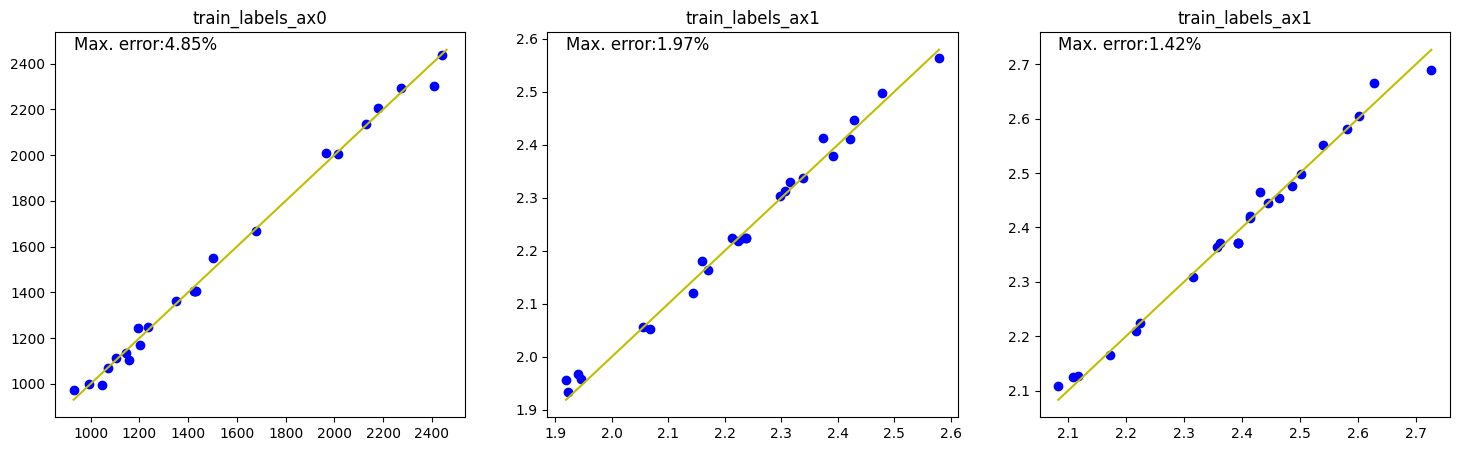

In [ ]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

numTag=3
urlsyn0 = "/content/drive/MyDrive/Colab Notebooks/BP/W1_wc.csv"
syn0t = pd.read_csv(urlsyn0,encoding='utf-8',header=None)
syn0t=np.array(syn0t)
W1=syn0t[1:,1:]

urlsyn1 = "/content/drive/MyDrive/Colab Notebooks/BP/W2_wc.csv"
syn1t = pd.read_csv(urlsyn1,encoding='utf-8',header=None)
syn1t=np.array(syn1t)
W2=syn1t[1:,1:]

#nOutputs=syn1.shape[1]
ur2 ="/content/drive/MyDrive/Colab Notebooks/BP/max_min_Xi_wc.csv"
max_min_Xi = np.array(pd.read_csv(ur2,encoding='utf-8'))[:,1:]
max_min_T=np.append([max_min_Xi[0][4:]], [max_min_Xi[1][4:]], axis=0)

ur2 ="/content/drive/MyDrive/Colab Notebooks/BP/wirecut_3.csv"
records = pd.read_csv(ur2,encoding='utf-8')

Xi1=records.iloc[0:records.shape[0]].values

Xi1=pd.DataFrame(Xi1)
inputD=Xi1.iloc[0:Xi1.shape[0],0:Xi1.shape[1]-numTag].values
#inputD[0] #[234.  ,   0.34, 115.  ,   0.37]
targetD=Xi1.iloc[:,list(Xi1.shape[1]-np.arange(numTag,0,-1))].values

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))

ptp_Xi=np.ptp(max_min_Xi,axis=0)


from sklearn.model_selection import train_test_split
res = train_test_split(inputD, targetD,
            train_size=0.8,
            test_size=0.2,
            random_state=42)
train_data1, test_data1, train_labels1, test_labels1 = res


N_train_data=(train_data1 - max_min_Xi[1][:4])/ptp_Xi[:4]
N_train_labels=(train_labels1 - max_min_Xi[1][4:])/ptp_Xi[4:]
inputD3_1=np.insert(N_train_data, 0, 1, axis=1)
targetD3=N_train_labels

#inputD3_1=np.array([1. , 0. , 0.5, 0.5, 0.5])

net_h=inputD3_1@W1.T
out_h=sigmoid(net_h,deriv=False)
out_H1=np.insert(out_h, 0, 1, axis=1)
net_o=out_H1@W2.T
out_o=sigmoid(net_o,deriv=False)
out_o_V=out_o*ptp_Xi[4:]+max_min_Xi[1][4:]
out_o_V

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
spec = gridspec.GridSpec(ncols=3, nrows=1,
              width_ratios=[1, 1,1], wspace=0.2,
              hspace=0.5, height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
ax0.plot([max_min_T[:,0][1],max_min_T[:,0][0]],[max_min_T[:,0][1],max_min_T[:,0][0]],color = "y")

ax0.scatter(train_labels1[:,0], out_o_V[:,0],color = "b")
ax0.set_title('train_labels_ax0')
ax0.text(max_min_T[:,0][1], max_min_T[:,0][0],'Max. error:'+str(round(max((abs(train_labels1-out_o_V)/train_labels1)[:,0])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[1])
ax1.plot([max_min_T[:,1][1],max_min_T[:,1][0]],[max_min_T[:,1][1],max_min_T[:,1][0]],color = "y")

ax1.scatter(train_labels1[:,1], out_o_V[:,1],color = "b")
ax1.set_title('train_labels_ax1')
ax1.text(max_min_T[:,1][1], max_min_T[:,1][0],'Max. error:'+str(round(max((abs(train_labels1-out_o_V)/train_labels1)[:,1])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[2])
ax1.plot([max_min_T[:,2][1],max_min_T[:,2][0]],[max_min_T[:,2][1],max_min_T[:,2][0]],color = "y")

ax1.scatter(train_labels1[:,2], out_o_V[:,2],color = "b")
ax1.set_title('train_labels_ax1')
ax1.text(max_min_T[:,2][1], max_min_T[:,2][0],'Max. error:'+str(round(max((abs(train_labels1-out_o_V)/train_labels1)[:,2])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

In [ ]:
out_o_V[:,0]

array([2292.91077674, 1551.00020463,  994.32851337, 2436.64543938,
        997.31515681, 1170.39447772, 1405.00890646, 1405.00890646,
       2010.07147515, 1243.09104252, 1250.05536809, 2137.11072561,
       1103.82065422, 2205.69950549,  973.68052293, 1113.9644722 ,
       1405.00890646, 2303.34436612, 1666.69472131, 1066.91006935,
       2006.35876039, 1134.31648342, 1405.00890646, 1362.0854679 ])

In [ ]:
test_labels1[:,0]

array([1650., 1102., 2461., 2336., 1427., 1423.])

Text(2.083, 2.727, 'Max. error:0.88%')

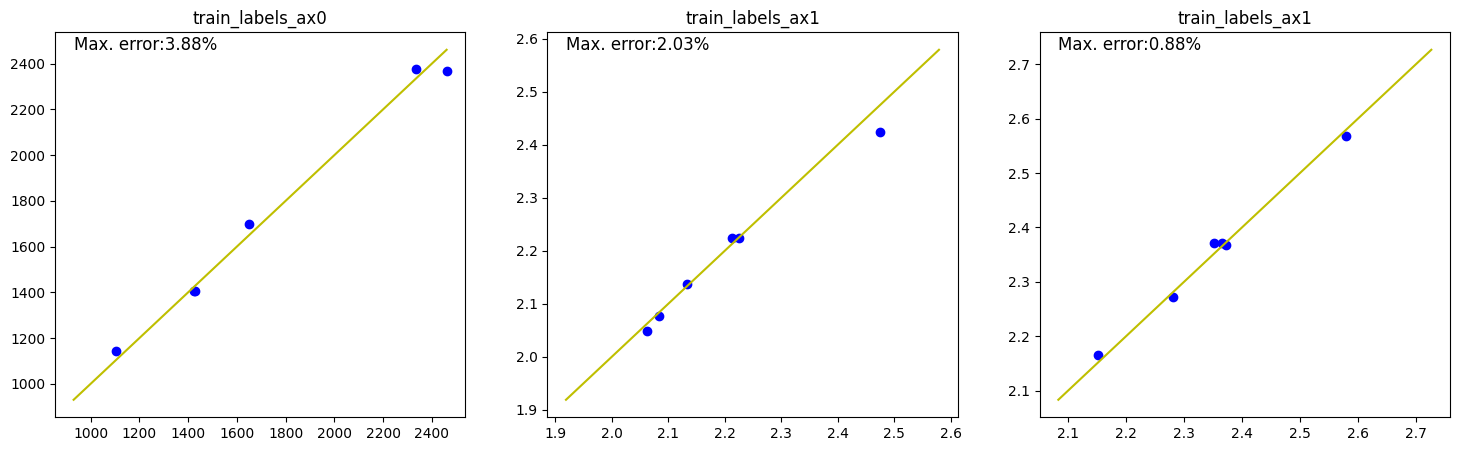

In [ ]:

N_train_data=(test_data1 - max_min_Xi[1][:4])/ptp_Xi[:4]
N_train_labels=(test_labels1 - max_min_Xi[1][4:])/ptp_Xi[4:]
inputD3_1=np.insert(N_train_data, 0, 1, axis=1)
targetD3=N_train_labels



net_h=inputD3_1@W1.T
out_h=sigmoid(net_h,deriv=False)
out_H1=np.insert(out_h, 0, 1, axis=1)
net_o=out_H1@W2.T
out_o=sigmoid(net_o,deriv=False)
out_o_V=out_o*ptp_Xi[4:]+max_min_Xi[1][4:]
out_o_V

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
spec = gridspec.GridSpec(ncols=3, nrows=1,
              width_ratios=[1, 1,1], wspace=0.2,
              hspace=0.5, height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
ax0.plot([max_min_T[:,0][1],max_min_T[:,0][0]],[max_min_T[:,0][1],max_min_T[:,0][0]],color = "y")

ax0.scatter(test_labels1[:,0], out_o_V[:,0],color = "b")
ax0.set_title('train_labels_ax0')
ax0.text(max_min_T[:,0][1], max_min_T[:,0][0],'Max. error:'+str(round(max((abs(test_labels1-out_o_V)/test_labels1)[:,0])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[1])
ax1.plot([max_min_T[:,1][1],max_min_T[:,1][0]],[max_min_T[:,1][1],max_min_T[:,1][0]],color = "y")

ax1.scatter(test_labels1[:,1], out_o_V[:,1],color = "b")
ax1.set_title('train_labels_ax1')
ax1.text(max_min_T[:,1][1], max_min_T[:,1][0],'Max. error:'+str(round(max((abs(test_labels1-out_o_V)/test_labels1)[:,1])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[2])
ax1.plot([max_min_T[:,2][1],max_min_T[:,2][0]],[max_min_T[:,2][1],max_min_T[:,2][0]],color = "y")

ax1.scatter(test_labels1[:,2], out_o_V[:,2],color = "b")
ax1.set_title('train_labels_ax1')
ax1.text(max_min_T[:,2][1], max_min_T[:,2][0],'Max. error:'+str(round(max((abs(test_labels1-out_o_V)/test_labels1)[:,2])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

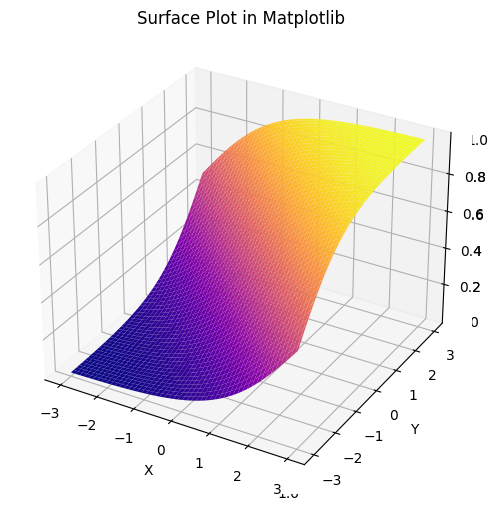

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(8, 6))
ax3d = plt.axes(projection="3d")

xdata = np.linspace(-3, 3, 100)
ydata = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xdata, ydata)
Z = 1 / (1 + np.exp(-X - Y))

ax3d = plt.axes(projection="3d")
ax3d.plot_surface(X, Y, Z, cmap="plasma")
ax3d.set_title("Surface Plot in Matplotlib")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

plt.show()

In [ ]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

numTag=3
urlsyn0 = "/content/drive/MyDrive/Colab Notebooks/BP/W1_wc.csv"
syn0t = pd.read_csv(urlsyn0,encoding='utf-8',header=None)
syn0t=np.array(syn0t)
W1=syn0t[1:,1:]

urlsyn1 = "/content/drive/MyDrive/Colab Notebooks/BP/W2_wc.csv"
syn1t = pd.read_csv(urlsyn1,encoding='utf-8',header=None)
syn1t=np.array(syn1t)
W2=syn1t[1:,1:]

#nOutputs=syn1.shape[1]
ur2 ="/content/drive/MyDrive/Colab Notebooks/BP/max_min_Xi_wc.csv"
max_min_Xi = np.array(pd.read_csv(ur2,encoding='utf-8'))[:,1:]
max_min_T=np.append([max_min_Xi[0][4:]], [max_min_Xi[1][4:]], axis=0)

ur2 ="/content/drive/MyDrive/Colab Notebooks/BP/wirecut_3.csv"
records = pd.read_csv(ur2,encoding='utf-8')

Xi1=records.iloc[0:records.shape[0]].values

Xi1=pd.DataFrame(Xi1)
inputD=Xi1.iloc[0:Xi1.shape[0],0:Xi1.shape[1]-numTag].values
#inputD[0] #[234.  ,   0.34, 115.  ,   0.37]
targetD=Xi1.iloc[:,list(Xi1.shape[1]-np.arange(numTag,0,-1))].values

In [ ]:
xdata = np.linspace(max_min_Xi[1][0], max_min_Xi[0][0], 100)
ydata = np.linspace(max_min_Xi[1][1], max_min_Xi[0][1], 100)
ydata

array([63.        , 63.12121212, 63.24242424, 63.36363636, 63.48484848,
       63.60606061, 63.72727273, 63.84848485, 63.96969697, 64.09090909,
       64.21212121, 64.33333333, 64.45454545, 64.57575758, 64.6969697 ,
       64.81818182, 64.93939394, 65.06060606, 65.18181818, 65.3030303 ,
       65.42424242, 65.54545455, 65.66666667, 65.78787879, 65.90909091,
       66.03030303, 66.15151515, 66.27272727, 66.39393939, 66.51515152,
       66.63636364, 66.75757576, 66.87878788, 67.        , 67.12121212,
       67.24242424, 67.36363636, 67.48484848, 67.60606061, 67.72727273,
       67.84848485, 67.96969697, 68.09090909, 68.21212121, 68.33333333,
       68.45454545, 68.57575758, 68.6969697 , 68.81818182, 68.93939394,
       69.06060606, 69.18181818, 69.3030303 , 69.42424242, 69.54545455,
       69.66666667, 69.78787879, 69.90909091, 70.03030303, 70.15151515,
       70.27272727, 70.39393939, 70.51515152, 70.63636364, 70.75757576,
       70.87878788, 71.        , 71.12121212, 71.24242424, 71.36

In [ ]:
max_min_Xi

array([[9.000e+00, 7.500e+01, 1.000e+01, 4.100e+01, 2.725e+03, 2.579e+00,
        2.827e+00],
       [2.000e+00, 6.300e+01, 2.000e+00, 1.000e+00, 9.710e+02, 1.822e+00,
        2.023e+00]])

In [ ]:
import numpy as np
import csv
import pandas as pd
numTag=3
#url = "https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/data4X3y_NQ.csv"
#records = pd.read_csv(ur2,encoding='utf-8')
Xi1=records.iloc[0:records.shape[0]].values

Xi1=pd.DataFrame(Xi1)
inputD=Xi1.iloc[0:Xi1.shape[0],0:Xi1.shape[1]-numTag].values
#inputD[0] #[234.  ,   0.34, 115.  ,   0.37]
targetD=Xi1.iloc[:,list(Xi1.shape[1]-np.arange(numTag,0,-1))].values
#targetD[0] #[ 47.39592, 943.3549 ]

#max_min_Xi=np.array([list(np.max(Xi1,axis=0)),list(np.min(Xi1,axis=0))])
ptp_Xi=np.ptp(max_min_Xi,axis=0)


from sklearn.model_selection import train_test_split
res = train_test_split(inputD, targetD,
            train_size=0.8,
            test_size=0.2,
            random_state=42)
train_data1, test_data1, test_data1, test_labels1 = res

N_train_data=(train_data1 - max_min_Xi[1][:4])/ptp_Xi[:4]
N_train_labels=(test_data1 - max_min_Xi[1][4:])/ptp_Xi[4:]

In [ ]:
inputD3_1=np.insert(N_train_data, 0, 1, axis=1)
targetD3=N_train_labels

In [ ]:
inputD3_1=(inputD - max_min_Xi[1][:4])/ptp_Xi[:4]
inputD3_1=np.insert(inputD3_1, 0, 1, axis=1)


In [ ]:
targetD

array([[2.7020e+03, 1.8220e+00, 2.0230e+00],
       [1.2350e+03, 2.1340e+00, 2.4115e+00],
       [2.1320e+03, 2.1600e+00, 2.4140e+00],
       [2.1810e+03, 2.0670e+00, 2.1720e+00],
       [1.0820e+03, 2.4220e+00, 2.5025e+00],
       [1.4610e+03, 2.2370e+00, 2.2925e+00],
       [1.3520e+03, 2.3470e+00, 2.4640e+00],
       [1.0720e+03, 2.3920e+00, 2.6280e+00],
       [1.4770e+03, 2.1930e+00, 2.2410e+00],
       [1.4830e+03, 2.2050e+00, 2.2850e+00],
       [2.0140e+03, 1.9190e+00, 2.1175e+00],
       [1.9670e+03, 2.1440e+00, 2.2240e+00],
       [1.0450e+03, 2.4780e+00, 2.3565e+00],
       [1.4580e+03, 2.2200e+00, 2.2510e+00],
       [1.1430e+03, 2.3150e+00, 2.5395e+00],
       [1.1020e+03, 2.4740e+00, 2.5800e+00],
       [1.2020e+03, 2.3060e+00, 2.5810e+00],
       [2.3360e+03, 2.0840e+00, 2.3730e+00],
       [1.4670e+03, 2.2130e+00, 2.2220e+00],
       [1.4670e+03, 2.2120e+00, 2.2910e+00],
       [1.7400e+03, 2.1080e+00, 2.3025e+00],
       [9.8700e+02, 2.5790e+00, 2.8270e+00],
       [1.

In [ ]:
net_h=inputD3_1@W1.T
out_h=sigmoid(net_h,deriv=False)
out_H1=np.insert(out_h, 0, 1, axis=1)
net_o=out_H1@W2.T
out_o=sigmoid(net_o,deriv=False)
out_o_V=out_o*ptp_Xi[4:]+max_min_Xi[1][4:]
out_o_V

array([[2.26880003e+03, 1.94130939e+00, 2.45349144e+00],
       [1.44446670e+03, 2.26382549e+00, 2.36866652e+00],
       [1.00946548e+03, 2.46860380e+00, 2.36459879e+00],
       [2.65542695e+03, 1.82468776e+00, 2.03492256e+00],
       [1.05633937e+03, 2.42618003e+00, 2.49982675e+00],
       [1.19727094e+03, 2.31133823e+00, 2.54581397e+00],
       [1.48060628e+03, 2.21403066e+00, 2.25719313e+00],
       [1.48060628e+03, 2.21403066e+00, 2.25719313e+00],
       [1.99878613e+03, 2.14264375e+00, 2.25715336e+00],
       [1.37015687e+03, 2.02061422e+00, 2.18946223e+00],
       [1.22493605e+03, 2.13217921e+00, 2.40273140e+00],
       [2.16707179e+03, 2.16518347e+00, 2.38726978e+00],
       [1.15021886e+03, 2.22663162e+00, 2.43794583e+00],
       [2.12857733e+03, 2.06120394e+00, 2.17654533e+00],
       [9.87843763e+02, 2.57259791e+00, 2.80882555e+00],
       [1.07332887e+03, 2.36764648e+00, 2.42594820e+00],
       [1.48060628e+03, 2.21403066e+00, 2.25719313e+00],
       [2.42574823e+03, 1.92970

ValueError: x and y must be the same size

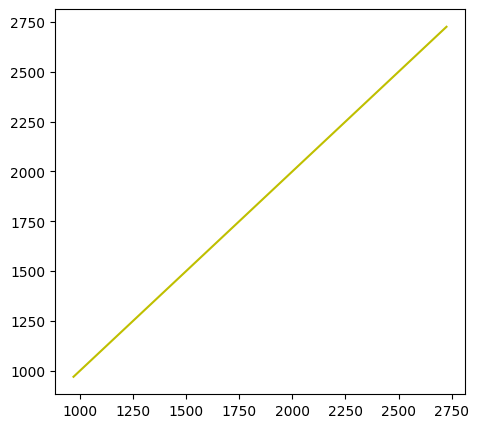

In [ ]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
spec = gridspec.GridSpec(ncols=3, nrows=1,
              width_ratios=[1, 1,1], wspace=0.2,
              hspace=0.5, height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
ax0.plot([max_min_T[:,0][1],max_min_T[:,0][0]],[max_min_T[:,0][1],max_min_T[:,0][0]],color = "y")

ax0.scatter(targetD[:,0], out_o_V[:,0],color = "b")
ax0.set_title('train_labels_ax0')
ax0.text(max_min_T[:,0][1], max_min_T[:,0][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,0])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[1])
ax1.plot([max_min_T[:,1][1],max_min_T[:,1][0]],[max_min_T[:,1][1],max_min_T[:,1][0]],color = "b")
ax1.scatter(targetD[:,1], out_o_V[:,1],color = "r")
ax1.set_title('train_labels_ax1')
ax1.text(max_min_T[:,1][1], max_min_T[:,1][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,1])*100,2))+'%', fontsize=12)

ax2 = fig.add_subplot(spec[2])
ax2.plot([max_min_T[:,2][1],max_min_T[:,2][0]],[max_min_T[:,2][1],max_min_T[:,2][0]],color = "r")
ax2.scatter(targetD[:,2], out_o_V[:,2],color = "y")
ax2.set_title('train_labels_ax2')
ax2.text(max_min_T[:,2][1], max_min_T[:,2][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,2])*100,2))+'%', fontsize=12)
#plt.title('')

ax0.set_xlabel('Target')
ax0.set_ylabel('Predict.')
ax1.set_xlabel('Target')
ax1.set_ylabel('Predict.')
ax2.set_xlabel('Target')
ax2.set_ylabel('Predict.')
plt.show()

In [ ]:
abs((targetD-out_o_V)/targetD)

ValueError: operands could not be broadcast together with shapes (30,3) (24,3) 

ValueError: x and y must be the same size

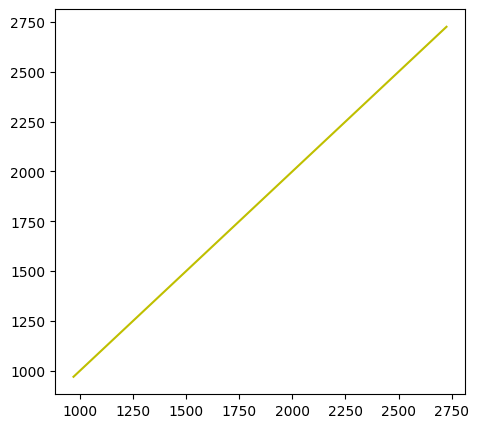

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

import pandas as pd

targetD=test_data1

max_min_T=max_min_Xi[:,4:]
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
spec = gridspec.GridSpec(ncols=3, nrows=1,
              width_ratios=[1, 1,1], wspace=0.2,
              hspace=0.5, height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
ax0.plot([max_min_T[:,0][1],max_min_T[:,0][0]],[max_min_T[:,0][1],max_min_T[:,0][0]],color = "y")

ax0.scatter(targetD[:,0], out_o_V[:,0],color = "b")
ax0.set_title('train_labels_ax0')
ax0.text(max_min_T[:,0][1], max_min_T[:,0][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,0])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[1])
ax1.plot([max_min_T[:,1][1],max_min_T[:,1][0]],[max_min_T[:,1][1],max_min_T[:,1][0]],color = "b")
ax1.scatter(targetD[:,1], out_o_V[:,1],color = "r")
ax1.set_title('train_labels_ax1')
ax1.text(max_min_T[:,1][1], max_min_T[:,1][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,1])*100,2))+'%', fontsize=12)

ax2 = fig.add_subplot(spec[2])
ax2.plot([max_min_T[:,2][1],max_min_T[:,2][0]],[max_min_T[:,2][1],max_min_T[:,2][0]],color = "r")
ax2.scatter(targetD[:,2], out_o_V[:,2],color = "y")
ax2.set_title('train_labels_ax2')
ax2.text(max_min_T[:,2][1], max_min_T[:,2][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,2])*100,2))+'%', fontsize=12)
#plt.title('')

ax0.set_xlabel('Target')
ax0.set_ylabel('Predict.')
ax1.set_xlabel('Target')
ax1.set_ylabel('Predict.')
ax2.set_xlabel('Target')
ax2.set_ylabel('Predict.')
plt.show()
